<a href="https://colab.research.google.com/github/MarwanAhmed20/EDA-ON-Datasets/blob/main/mpg%20dataset%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/autompg-dataset
!unzip autompg-dataset.zip

  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 14.1MB/s]
Archive:  autompg-dataset.zip
  inflating: auto-mpg.csv            


In [ ]:
df = pd.read_csv('auto-mpg.csv')

# Display the first few rows of the DataFrame
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.drop('car name',axis = 1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
index_list = df.index[df['horsepower'] == '?'].tolist()
index_list

[32, 126, 330, 336, 354, 374]

In [ ]:
df.iloc[32]

mpg             25.0
cylinders          4
displacement    98.0
horsepower         ?
weight          2046
acceleration    19.0
model year        71
origin             1
Name: 32, dtype: object

In [ ]:
df.drop(index_list, axis=0, inplace=True)

In [ ]:
df['horsepower'] = df['horsepower'].astype('int64')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_new = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


In [ ]:
df_new.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

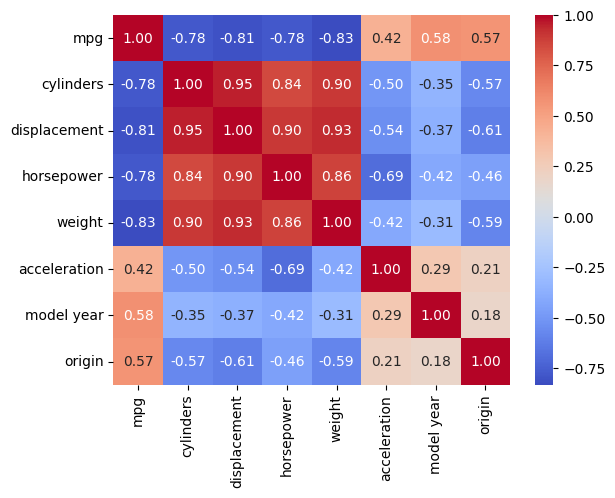

In [ ]:
sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')

<Axes: >

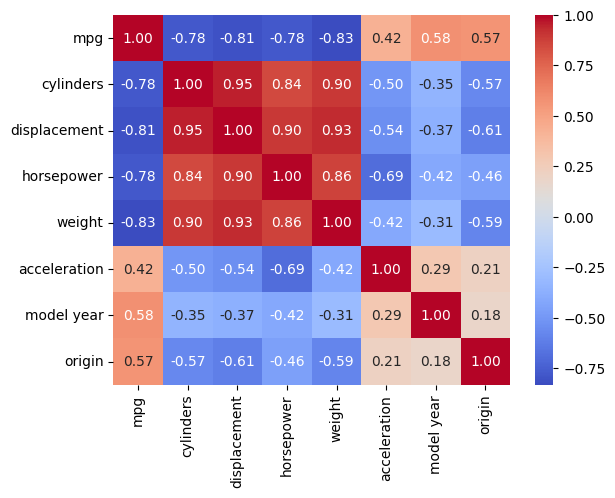

In [ ]:
sns.heatmap(df_new.corr(),annot = True,cmap='coolwarm',fmt='.2f')

In [ ]:
#df_new.drop('weight',axis = 1,inplace = True)
df_new.drop('cylinders',axis = 1,inplace = True)
df_new.drop('displacement',axis = 1,inplace = True)


<Axes: >

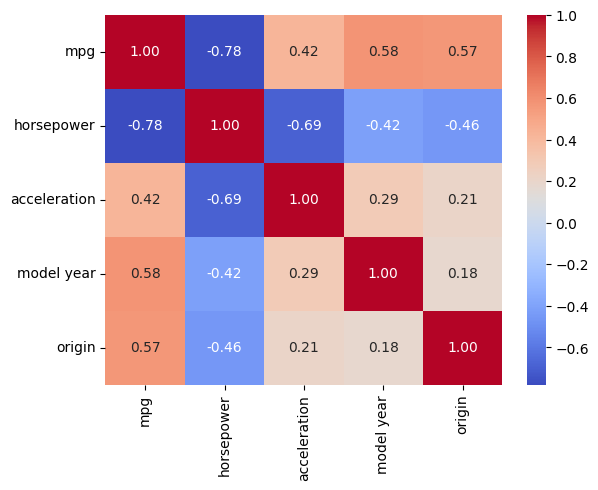

In [ ]:
sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')

In [ ]:
Y = df_new['mpg']
X = df_new.drop('mpg',axis=1)
X

,horsepower,weight,acceleration,model year,origin
0,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...
387,-0.480448,-0.221125,0.021294,1.636410,-0.716641
388,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,-0.662540,-0.415627,1.110088,1.636410,-0.716641


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.1721980865508787